In [3]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import sys
sys.path.append("../")

from C4_theo_asymptotique__trapz import C4_court, C4_long
from DoubleRigidWallOverdampedBrownExp_Cython import RigidWallOverdampedLangevin3D
from Physic_function_problem import *
import cythonised_simu_part

from scipy.integrate import quad
from scipy.io import loadmat
from scipy.optimize import curve_fit
import matplotlib as mpl
import matplotlib.pyplot as plt
import numpy as np
from mpl_toolkits.mplot3d import Axes3D
from numpy import trapz
import matplotlib.gridspec as gridspec
from matplotlib.collections import LineCollection
from mpltools import annotation
from scipy.optimize import curve_fit

import csv


def cm2inch(value):
    return value / 2.54

from tqdm import tqdm


from matplotlib import rc
import seaborn as sns
custom_params = {
    "xtick.direction": "in",
    "ytick.direction": "in",
    "lines.markeredgecolor": "k",
    "lines.markeredgewidth": 0.3,
    "figure.dpi": 200,
    "text.usetex": True,
    "font.family": "serif",
    "font.size":8,
    'axes.titlesize':10,
    'axes.labelsize':10,
}
# sns.set_context("notebook", rc={"lines.linewidth": 3})


sns.set_theme(context = "paper", style="ticks", rc=custom_params)

In [4]:
# mpl.rcParams.keys()

In [5]:
# Param fixé comme expériences
a = 1.519e-6 #1.12e-6/2
H = 5e-6
lD = 88.0e-9 #Répultion mur
kBT=1.38e-23*300
lB = 526e-9 #gravité
B = 5.0
eta=0.001

zz = np.linspace(-H+H*1e-3, H-H*1e-3, 1000)

dt = 1e-2
Nt = 10000000
Nt_sub = 1
tt = np.linspace(dt, dt*Nt, Nt)

In [8]:
mean_Dx = np.trapz(P_eq(zz, B, lD, lB, H)/np.trapz(P_eq(zz, B, lD, lB, H), zz)*D_para(zz, a, eta, H), zz)
mean_Dz = np.trapz(P_eq(zz, B, lD, lB, H)/np.trapz(P_eq(zz, B, lD, lB, H), zz)*D_perp(zz, a, eta, H), zz)

In [6]:
import glob

In [259]:
bins = 100

files = glob.glob("data_calcul_pdf/*")

results = np.zeros([(len(files)), (len(np.load(files[0]))), bins])
for n, file in enumerate(files):
    result = np.load(file)
    
    for m, line in  enumerate(result):
        results[n, m, :] = list(line)
        

In [136]:
np.shape(results), np.shape(dX_hist)

((191, 37, 100), (37, 100))

# results$[Nj, dt, dX]$

In [122]:
dt_C4 = [*np.arange(1, 10), *np.arange(10, 100, 10), *np.arange(100, 1000, 100), *np.arange(1000, 10000, 1000), 10000]
Sigma = 7
D_0 = 4e-21 / (6*np.pi*0.001*a)
dt_s_C4 = np.array(dt_C4) * dt

limits = np.sqrt(2*D_0*dt_s_C4) * Sigma

dX_hist = []
for n in range(len(dt_C4)):
    limit = limits[n]
    _, X = np.histogram([], bins = bins, range = [-limit, + limit]) 
    dX_hist.append((X[1:]+X[:-1])/2)
    
dX_hist = np.array(dX_hist)

In [209]:
Ntau1 = 1
dx_1 = dX_hist[Ntau1,:]
data_1 = results[:,Ntau1, :]
Mean1 = np.mean(data_1, axis=0)
Z1 = np.trapz(Mean1, dX_1)

Ntau2 = 10
dx_2 = dX_hist[Ntau2,:]
data_2 = results[:,Ntau2, :]
Mean2 = np.mean(data_2, axis=0)
Z2 = np.trapz(Mean2, dX_2)

Ntau3 = 36
dx_3 = dX_hist[Ntau3,:]
data_3 = results[:,Ntau3, :]
Mean3 = np.mean(data_3, axis=0)
Z3 = np.trapz(Mean3, dX_3)

In [230]:
mean_Dx = np.trapz(P_eq(zz, B, lD, lB, H)/np.trapz(P_eq(zz, B, lD, lB, H), zz)*D_para(zz, a, eta, H), zz)
mean_Dz = np.trapz(P_eq(zz, B, lD, lB, H)/np.trapz(P_eq(zz, B, lD, lB, H), zz)*D_perp(zz, a, eta, H), zz)

dxCOURT = np.linspace(-0.4, 0.4, 1000)
dxMID =  np.linspace(-1.5, 1.5, 1000)
dxLONG =  np.linspace(-1.5, 1.5, 1000)

In [231]:
gauss1 = gauss(x=dxCOURT*1e-6, mu=0, std=np.sqrt(2*mean_Dx*Ntau1*dt))
gauss2 = gauss(x=dxMID*1e-6, mu=0, std=np.sqrt(2*mean_Dx*Ntau2*dt))
gauss3 = gauss(x=dxLONG*1e-6, mu=0, std=np.sqrt(2*mean_Dx*Ntau3*dt))


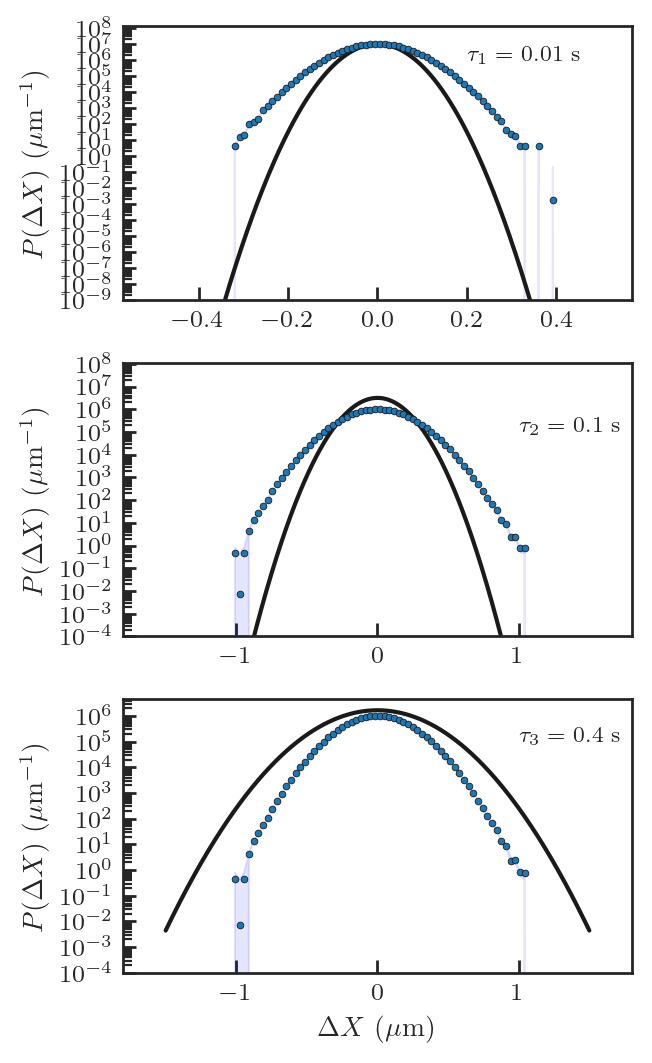

In [242]:
fig = plt.figure(figsize = (3.3, 9/1.68),  tight_layout=True)

ax1 = plt.subplot(311)
Min = np.min(data_1, axis=0)
Max = np.max(data_1, axis=0)
ax1.semilogy(dxCOURT, gauss1/np.trapz(gauss1, dxCOURT*1e-6)  , "-", color="k", linewidth=1.5,)
ax1.semilogy(dx_1*1e6, Mean1/ Z1,".", color="tab:blue")
ax1.fill_between(dx_1*1e6, Min / Z1, Max / Z1, color='blue', alpha=0.1)

ax1.text(0.2, 1e6, r"$\tau_1 = $ "+ str(Ntau1*dt) + " s", fontsize=8)
# ax1.set_xlim(-0.3, 0.3)
ax1.set_ylim(1e-2, None)
ax1.set(
    # xlabel = r"$\Delta x$ ($\mu$m)",
    ylabel = r"$P(\Delta X)$ ($\mu$m$^{-1}$)",
)
# ax1.text(-0.28, 10, r"(a)", transform=ax1.transData)
ax1.set_ylim(1e-9, None)

locmaj = mpl.ticker.LogLocator(base=10.0, subs=(1.0, ), numticks=100)
ax1.yaxis.set_major_locator(locmaj)
locmin = mpl.ticker.LogLocator(base=10.0, subs=np.arange(2, 10) * .1,
                                      numticks=100)
ax1.yaxis.set_minor_locator(locmin)
ax1.yaxis.set_minor_formatter(mpl.ticker.NullFormatter())





ax2 = plt.subplot(312)
Min = np.min(data_2, axis=0)
Max = np.max(data_2, axis=0)
ax2.semilogy(dxMID, gauss2/np.trapz(gauss2, dxMID*1e-6) , "-", color="k", linewidth=1.5,)
ax2.semilogy(dx_2*1e6, Mean2/ Z2,".", color="tab:blue")
ax2.fill_between(dx_2*1e6, Min / Z2, Max / Z2, color='blue', alpha=0.1)


# ax2.set_xlim(-13, 13)
ax2.set_ylim(1e-4, None)
ax2.text(1, 1e5, r"$\tau_2 = $ "+ str(Ntau2*dt) + " s", fontsize=8)
ax2.set(
    # xlabel = r"$\Delta x$ ($\mu$m)",
    ylabel = r"$P(\Delta X)$ ($\mu$m$^{-1}$)",
)
# ax2.text(-12, 1e-1, r"(b)", transform=ax2.transData)   

locmaj = mpl.ticker.LogLocator(base=10.0, subs=(1.0, ), numticks=100)
ax2.yaxis.set_major_locator(locmaj)
locmin = mpl.ticker.LogLocator(base=10.0, subs=np.arange(2, 10) * .1,
                                      numticks=100)
ax2.yaxis.set_minor_locator(locmin)
ax2.yaxis.set_minor_formatter(mpl.ticker.NullFormatter())



ax3 = plt.subplot(313)
Min = np.min(data_2, axis=0)
Max = np.max(data_2, axis=0)
ax3.semilogy(dxLONG, gauss3/np.trapz(gauss3, dxLONG*1e-6) , "-", color="k", linewidth=1.5,)
ax3.semilogy(dx_2*1e6, Mean2/ Z2, ".", color="tab:blue")
ax3.fill_between(dx_2*1e6, Min / Z2, Max / Z2, color='blue', alpha=0.1)

# ax3.set_xlim(-45, 45)
ax3.set_ylim(1e-4, None)
ax3.text(1, 1e5, r"$\tau_3 = $ "+ str(round(Ntau3*dt,1)) + " s", fontsize=8)
ax3.set(
    xlabel = r"$\Delta X$ ($\mu$m)",
    ylabel = r"$P(\Delta X)$ ($\mu$m$^{-1}$)",
)
# ax3.text(-42, 4e-2, r"(c)", transform=ax3.transData)  

locmaj = mpl.ticker.LogLocator(base=10.0, subs=(1.0, ), numticks=100)
ax3.yaxis.set_major_locator(locmaj)
locmin = mpl.ticker.LogLocator(base=10.0, subs=np.arange(2, 10) * .1,
                                      numticks=100)
ax3.yaxis.set_minor_locator(locmin)
ax3.yaxis.set_minor_formatter(mpl.ticker.NullFormatter())


fig.tight_layout()

# plt.savefig("../Figures/Refery_SimuC4_Petit-Gap.pdf")

In [272]:
np.shape(dX_hist)

(37, 100)

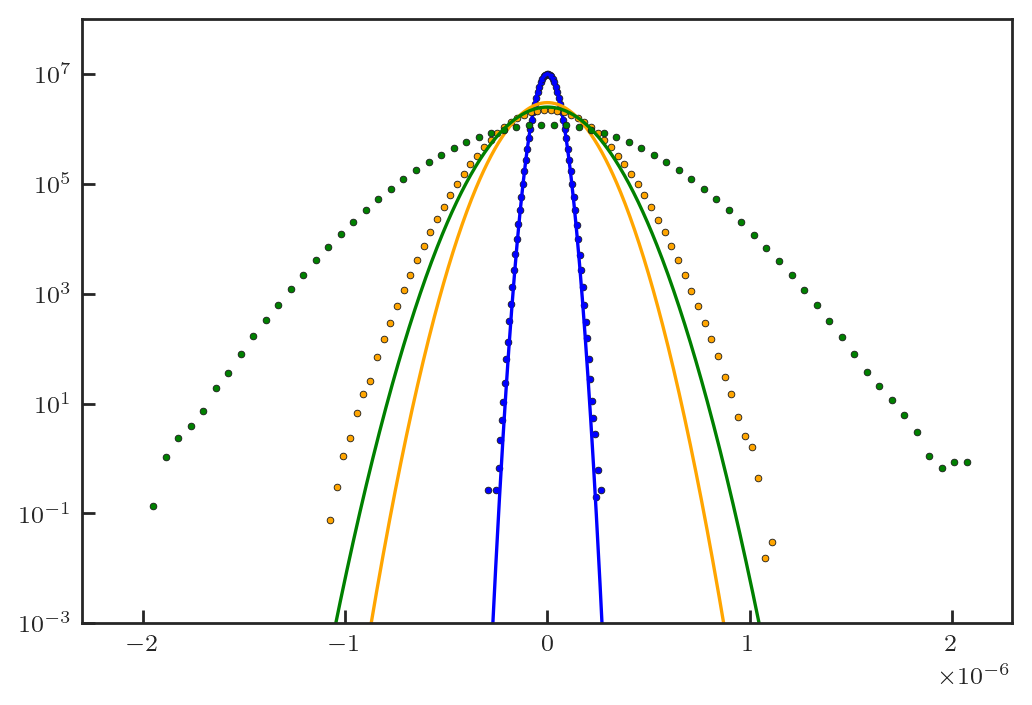

In [297]:
test = np.load("../a.npy")
dx_test = np.linspace(-2.3e-6, 2.3e-6, 1000)
Color= ["blue", "orange", "green"]

for n, i in enumerate([0, 10, 15]):
    plt.semilogy(dX_hist[i,:], test[i,:] / np.trapz(test[i,:], dX_hist[i,:]), ".", color=Color[n])
    gaussian = gauss(x=dx_test, mu=0, std=np.sqrt(2*mean_Dx*(i+1)*dt))
    plt.plot(dx_test, gaussian/np.trapz(gaussian,dx_test), "-", color=Color[n])

plt.ylim([1e-3, 1e8])
plt.xlim([-2.3e-6, 2.3e-6])
# plt.savefig("../Figures/Test-AlgoMersenne_Petit-Gap.pdf")